# Set-up the environment

In [1]:
import requests
from bs4 import BeautifulSoup

# Making a GET Request

In [42]:
def get_the_data(base_url):
    # Make the request
    # response = requests.get(url, headers=headers)  # ✅ Now 'response' is defined
    response = requests.get(base_url)

    # Create the BeautifulSoup object only if the request was successful
    if response.status_code == 200:
        html = response.content
        soup = BeautifulSoup(html, "html.parser")
        print("✅ BeautifulSoup object created!")
    else:
        print("❌ Request failed. Cannot create soup.")
    return soup

In [34]:
def write_To_Stage(soup,file_name='stage.html'):
    # Save the HTML to a file
    with open(f"stage/{file_name}", "wb") as file:
        file.write(soup.prettify('utf-8'))
        print("✅ HTML saved to file!")

In [35]:
base_url = "https://mmb.moneycontrol.com/"
mc = get_the_data(base_url)
write_To_Stage(mc,'moneycontrol.html')

✅ BeautifulSoup object created!
✅ HTML saved to file!


In [19]:
head_ = soup.find('head')
next = head_.find_all('script')


In [25]:
# for r in next:
#     print(r)

In [40]:
url ='https://mmb.moneycontrol.com/'


In [41]:
mc1 = get_the_data(url)
write_To_Stage(mc1,'moneycontrolNew.html')

✅ BeautifulSoup object created!
✅ HTML saved to file!


In [44]:
div1 = mc1.find_all('div', {'class': 'postItem_text_paragraph__3XhZQ'})

In [50]:
get_the_data('https://mmb.moneycontrol.com/')

✅ BeautifulSoup object created!


<!DOCTYPE html>
<html><head><link as="style" href="https://stat2.moneycontrol.com/mccss/headfoot/mc_header.css?v=1.11" rel="preload"/><meta charset="utf-8"/><link href="https://www.moneycontrol.com/favicon.ico" rel="icon"/><title>Online Business Forum, Economics &amp; Stocks Discussion, Share Market Ideas, Questions and Answers India - MoneyControl</title><meta content="India's #1 online forum for business discussion, stocks discussion, share market ideas, questions and answers on india and world economy. - MoneyControl" name="description"/><meta content="Online Business Forum, Economic Discussions, Stocks Discussion, Share Market Ideas, Stock Market FAQ" name="Keywords"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="index,follow" name="robots"/><meta content="index,follow" name="googlebot"/><meta content="https://mmb.moneycontrol.com/" property="og:url"/><meta

In [51]:
get_the_data('https://sb.scorecardresearch.com/p?c1=2&amp;c2=6683813&amp;cv=2.0&amp;cj=1')

✅ BeautifulSoup object created!


GIF89a  €  ÿÿÿ   !ù    ,       D ;

In [53]:
pip install selenium

     ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.5 MB 991.0 kB/s eta 0:00:10
      --------------------------------------- 0.2/9.5 MB 2.8 MB/s eta 0:00:04
     - -------------------------------------- 0.5/9.5 MB 4.2 MB/s eta 0:00:03
     ---- ----------------------------------- 1.1/9.5 MB 6.1 MB/s eta 0:00:02
     -------- ------------------------------- 1.9/9.5 MB 8.8 MB/s eta 0:00:01
     ---------- ----------------------------- 2.5/9.5 MB 9.4 MB/s eta 0:00:01
     ------------ --------------------------- 3.1/9.5 MB 9.8 MB/s eta 0:00:01
     -------------- ------------------------- 3.4/9.5 MB 9.4 MB/s eta 0:00:01
     --------------- ------------------------ 3.7/9.5 MB 9.1 MB/s eta 0:00:01
     ---------------- ----------------------- 4.0/9.5 MB 9.1 MB/s eta 0:00:01
     ------------------ --------------------- 4.4/9.5 MB 8.7 MB/s eta 0:00:01
     --------------------- ------------------ 5.2/9.5 MB 9.5 MB/s eta


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

def scrape_with_requests(url, headers=None):
    """Attempts to scrape with requests. Good for static content."""
    try:
        if headers:
            response = requests.get(url, headers=headers)
        else:
            response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        soup = BeautifulSoup(response.content, "html.parser")
        return soup
    except requests.exceptions.RequestException as e:
        print(f"Error during requests: {e}")
        return None

def scrape_with_selenium(url, wait_for_element=None, headers=None, cookies=None):
    """Scrapes with Selenium, handling dynamic content."""
    chrome_options = Options()
    chrome_options.add_argument("--headless") #headless mode
    chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36") #user agent
    driver = webdriver.Chrome(options=chrome_options)
    try:

        driver.get(url)

        if cookies:
          for cookie in cookies:
            driver.add_cookie(cookie)
          driver.get(url) #reload the page with cookies

        if wait_for_element:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, wait_for_element))
            )
            time.sleep(2) #give extra time for all elements to load.

        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        return soup

    except Exception as e:
        print(f"Error during Selenium scraping: {e}")
        return None
    finally:
        driver.quit()

# Example usage:
url = 'https://mmb.moneycontrol.com/'

#Try requests first, if it fails, try selenium.
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

soup = scrape_with_requests(url, headers=headers)

# if not soup:
#     print("Requests failed, attempting Selenium...")
#     #Example of passing cookies
#     #cookies = [{'name': 'cookie_name', 'value': 'cookie_value', 'domain': 'example.com', 'path': '/'}]
#     soup = scrape_with_selenium(url, wait_for_element="YOUR_CSS_SELECTOR_OF_A_DYNAMIC_ELEMENT") #Replace with a CSS selector of an element that loads after javascript.
# if soup:
#     # Now you can parse the soup object
#     # Example: get all links
#     for link in soup.find_all("a"):
#         print(link.get("href"))
#     #Example: get all titles
#     for title in soup.find_all("h1"):
#         print(title.text)
# else:
#     print("Scraping failed.")

In [56]:
soup

<!DOCTYPE html>
<html><head><link as="style" href="https://stat2.moneycontrol.com/mccss/headfoot/mc_header.css?v=1.11" rel="preload"/><meta charset="utf-8"/><link href="https://www.moneycontrol.com/favicon.ico" rel="icon"/><title>Online Business Forum, Economics &amp; Stocks Discussion, Share Market Ideas, Questions and Answers India - MoneyControl</title><meta content="India's #1 online forum for business discussion, stocks discussion, share market ideas, questions and answers on india and world economy. - MoneyControl" name="description"/><meta content="Online Business Forum, Economic Discussions, Stocks Discussion, Share Market Ideas, Stock Market FAQ" name="Keywords"/><meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="index,follow" name="robots"/><meta content="index,follow" name="googlebot"/><meta content="https://mmb.moneycontrol.com/" property="og:url"/><meta

In [57]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

def scrape_moneycontrol_forums(url):
    """Scrapes Moneycontrol forum discussion details."""
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")
    driver = webdriver.Chrome(options=chrome_options)

    try:
        driver.get(url)

        # Wait for the forum discussions to load (adjust selector if needed)
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, ".clearfix.forum_list"))
        )
        time.sleep(2) #give extra time for all elements to load.

        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")

        # Find the forum discussion elements.
        forum_lists = soup.find_all("div", class_="clearfix forum_list")

        discussion_details = []

        for forum_list in forum_lists:
            # Extract relevant information (adjust selectors as needed)
            try:
                title_element = forum_list.find("a", class_="forum_title")
                title = title_element.text.strip() if title_element else "Title not found"
                link = title_element["href"] if title_element and title_element.has_attr('href') else "Link not found"
                author_element = forum_list.find("span", class_="fl")
                author = author_element.text.strip() if author_element else "Author not found"

                reply_element = forum_list.find("span", class_="fr")
                replies = reply_element.text.strip() if reply_element else "Replies not found"

                discussion_details.append({
                    "title": title,
                    "link": link,
                    "author": author,
                    "replies": replies,
                })

            except Exception as e:
                print(f"Error extracting forum details: {e}")
                continue # go to next forum list.

        return discussion_details

    except Exception as e:
        print(f"Error during Selenium scraping: {e}")
        return None
    finally:
        driver.quit()

# Example usage:
url = "https://mmb.moneycontrol.com/"
forum_data = scrape_moneycontrol_forums(url)

if forum_data:
    for discussion in forum_data:
        print("Title:", discussion["title"])
        print("Link:", discussion["link"])
        print("Author:", discussion["author"])
        print("Replies:", discussion["replies"])
        print("-" * 20)
else:
    print("Failed to scrape forum discussions.")

Error during Selenium scraping: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF686F0FE45+26629]
	(No symbol) [0x00007FF686E76010]
	(No symbol) [0x00007FF686D0931A]
	(No symbol) [0x00007FF686D5F8E7]
	(No symbol) [0x00007FF686D5FB1C]
	(No symbol) [0x00007FF686DB34A7]
	(No symbol) [0x00007FF686D87AEF]
	(No symbol) [0x00007FF686DB0169]
	(No symbol) [0x00007FF686D87883]
	(No symbol) [0x00007FF686D50550]
	(No symbol) [0x00007FF686D51803]
	GetHandleVerifier [0x00007FF6872672BD+3529853]
	GetHandleVerifier [0x00007FF68727DA22+3621858]
	GetHandleVerifier [0x00007FF6872724D3+3575443]
	GetHandleVerifier [0x00007FF686FDB77A+860474]
	(No symbol) [0x00007FF686E8088F]
	(No symbol) [0x00007FF686E7CBC4]
	(No symbol) [0x00007FF686E7CD66]
	(No symbol) [0x00007FF686E6C2C9]
	BaseThreadInitThunk [0x00007FF9F1E6E8D7+23]
	RtlUserThreadStart [0x00007FF9F3D9BF2C+44]

Failed to scrape forum discussions.


In [58]:
url = "https://mmb.moneycontrol.com/"

In [62]:
# url = "https://www.zalando.nl/herenschoenen/"
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")
driver = webdriver.Chrome(options=chrome_options)
driver.get(url)
html_content = driver.execute_script('return document.body.innerHTML')
# soep = BeautifulSoup(html_content, 'lxml')

'<div id="blocktestdfp" style="width:0px;height:0px;margin: 0 auto;text-align: center;" data-google-query-id="CKeh-fLNk4wDFVoAgwMddB0z9g"><div id="google_ads_iframe_/22911733514/32339_block_MC_DT_0__container__" style="border: 0pt none; display: inline-block; width: 1px; height: 1px;"><iframe frameborder="0" src="https://facdb4605a609a2da02cd5d072abac0e.safeframe.googlesyndication.com/safeframe/1-0-41/html/container.html" id="google_ads_iframe_/22911733514/32339_block_MC_DT_0" title="3rd party ad content" name="" scrolling="no" marginwidth="0" marginheight="0" width="1" height="1" data-is-safeframe="true" sandbox="allow-forms allow-popups allow-popups-to-escape-sandbox allow-same-origin allow-scripts allow-top-navigation-by-user-activation" allow="private-state-token-redemption;attribution-reporting" aria-label="Advertisement" tabindex="0" data-google-container-id="b" style="border: 0px; vertical-align: bottom;" data-load-complete="true"></iframe></div></div><div id="__next"><div style
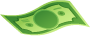
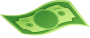
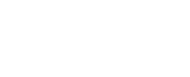
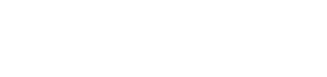
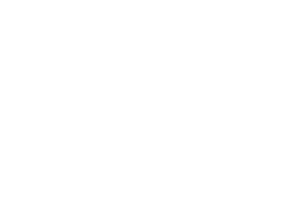
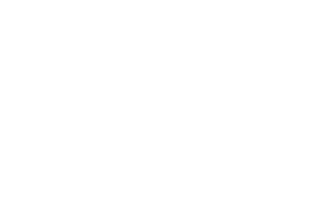
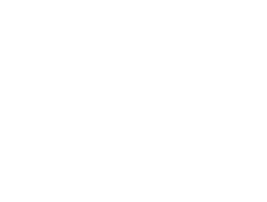
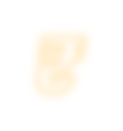
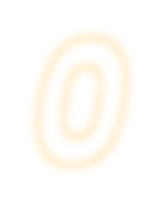
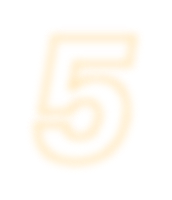
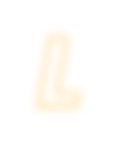
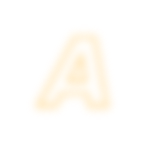
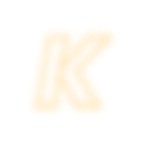
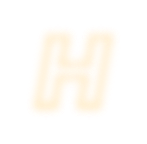
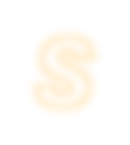
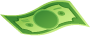
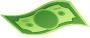
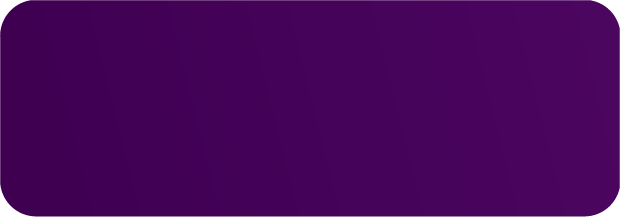
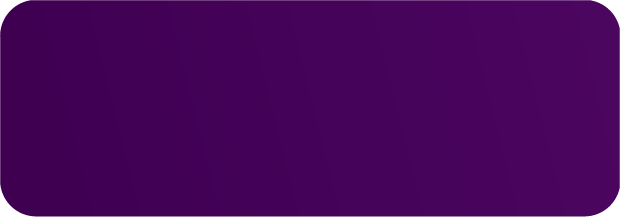
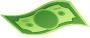
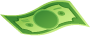
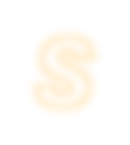
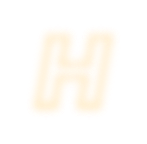
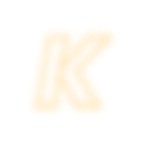
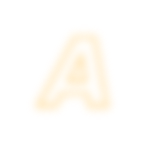
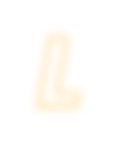
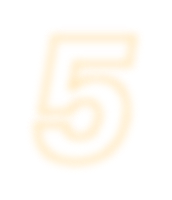
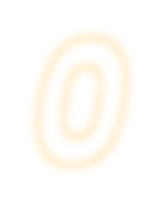
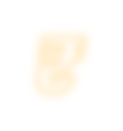
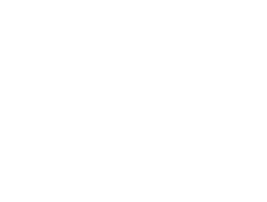
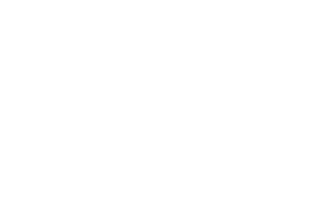
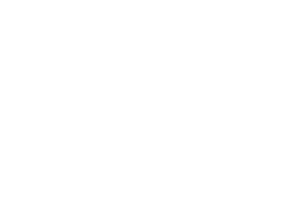
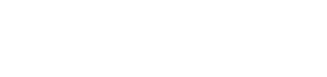
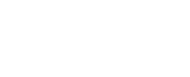
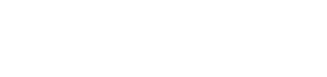
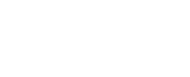
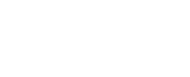
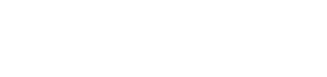
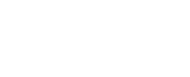
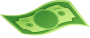
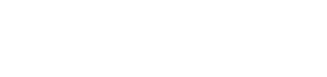
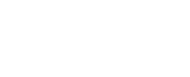
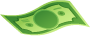
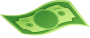
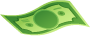
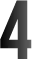
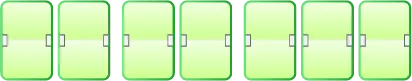
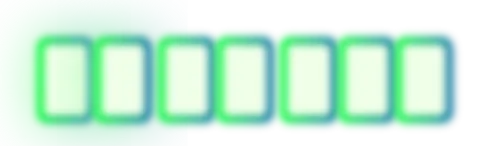
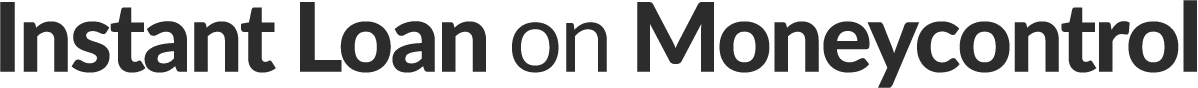
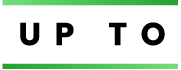
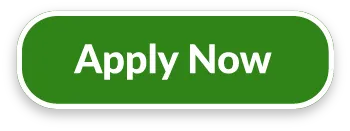
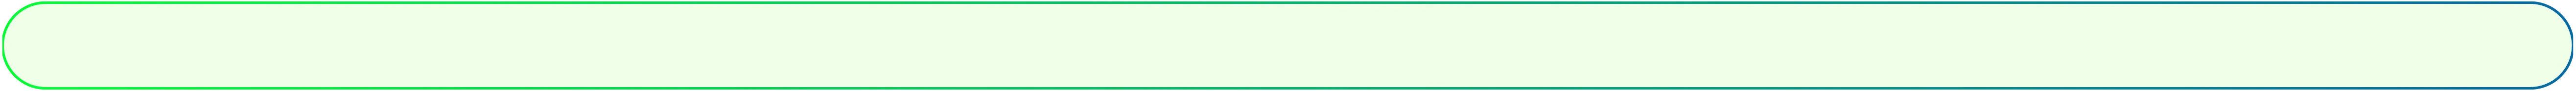
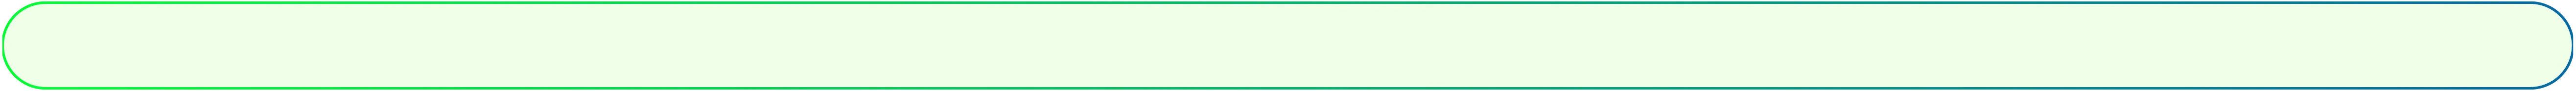
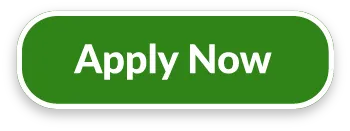
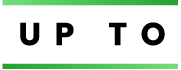
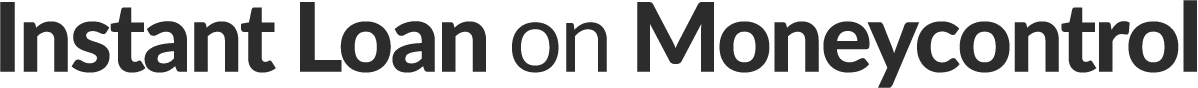
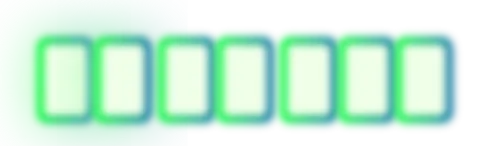
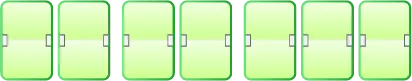
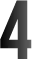
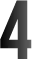
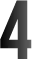
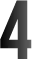
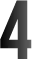
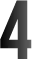

In [64]:
html_content

In [73]:
type(html_content)

str

In [75]:
with open('moneycontrolALL.txt', 'w', encoding='utf-8') as file:
    file.write(html_content)

In [67]:
write_To_Stage(str(html_content),'moneycontrolForumsALL.html')

AttributeError: 'str' object has no attribute 'prettify'

In [80]:
root_url = "https://mmb.moneycontrol.com/"
urls = [ '{root}?page={i}'.format(root=root_url, i=i) for i in range(1,808) ]

In [81]:
urls

['https://mmb.moneycontrol.com/?page=1',
 'https://mmb.moneycontrol.com/?page=2',
 'https://mmb.moneycontrol.com/?page=3',
 'https://mmb.moneycontrol.com/?page=4',
 'https://mmb.moneycontrol.com/?page=5',
 'https://mmb.moneycontrol.com/?page=6',
 'https://mmb.moneycontrol.com/?page=7',
 'https://mmb.moneycontrol.com/?page=8',
 'https://mmb.moneycontrol.com/?page=9',
 'https://mmb.moneycontrol.com/?page=10',
 'https://mmb.moneycontrol.com/?page=11',
 'https://mmb.moneycontrol.com/?page=12',
 'https://mmb.moneycontrol.com/?page=13',
 'https://mmb.moneycontrol.com/?page=14',
 'https://mmb.moneycontrol.com/?page=15',
 'https://mmb.moneycontrol.com/?page=16',
 'https://mmb.moneycontrol.com/?page=17',
 'https://mmb.moneycontrol.com/?page=18',
 'https://mmb.moneycontrol.com/?page=19',
 'https://mmb.moneycontrol.com/?page=20',
 'https://mmb.moneycontrol.com/?page=21',
 'https://mmb.moneycontrol.com/?page=22',
 'https://mmb.moneycontrol.com/?page=23',
 'https://mmb.moneycontrol.com/?page=24',
 